<h1><font color='blue'>Lending Club</font></h1>

In [1]:
# Import the python environment libraries
import sklearn
import numpy as np
import pandas as pd
#import seaborn as sb
#from sklearn.linear_model import SGDClassifier
#from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from __future__ import print_function
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
import collections
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing

%matplotlib inline

In [2]:
# Import the data 
data = pd.read_csv("data.csv", parse_dates = [1])

#Adding additional dates to the dataframe 
df_date_split = pd.DatetimeIndex(data['issue_d'])
data['issue_year'] = df_date_split.year
data['issue_month'] = df_date_split.month

# Setting the initial features
df_features = data.copy()
del df_features['id']
del df_features['new_int_rate']
del df_features['issue_d']


# Preview the data
data.head(1)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,target,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,...,0.0,0.0,42384,171.62,42659,0,11,2,2016,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41034 entries, 0 to 41033
Data columns (total 46 columns):
id                         41034 non-null int64
member_id                  41034 non-null object
loan_amnt                  41034 non-null int64
funded_amnt                41034 non-null int64
funded_amnt_inv            41034 non-null float64
term                       41034 non-null int64
int_rate                   41034 non-null float64
installment                41034 non-null float64
grade                      41034 non-null object
sub_grade                  41034 non-null object
emp_length                 41034 non-null int64
home_ownership             41034 non-null object
annual_inc                 41034 non-null float64
verification_status        41034 non-null object
issue_d                    41034 non-null object
loan_status                41034 non-null object
pymnt_plan                 41034 non-null object
purpose                    41034 non-null object
zip_code  

In [7]:
#purpose of the loan for incoming less than 100,000
data[data.annual_inc < 100000].purpose.value_counts()

debt_consolidation    16441
credit_card            4357
other                  3635
home_improvement       2250
major_purchase         1940
small_business         1482
car                    1392
wedding                 834
medical                 613
moving                  519
vacation                350
house                   333
educational             319
renewable_energy         82
Name: purpose, dtype: int64

In [8]:
data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,zip_code,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,target,issue_year,issue_month
count,4.103400e+04,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,4.103400e+04,41034.000000,...,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.000000,41034.0,41034.000000
mean,6.803563e+05,11165.055198,10892.249720,10410.807692,42.421992,0.121650,323.607605,4.955500,6.931481e+04,50182.273237,...,98.520570,13.321207,42550.677414,2663.782731,42588.558464,0.045182,12.156748,1.883852,2016.0,7.190574
std,2.051338e+05,7436.656392,7168.313752,7094.097797,10.624903,0.037359,208.869736,3.460698,6.356160e+04,32869.554989,...,699.759165,153.860237,104.625030,4424.451962,97.330115,0.208642,3.729718,0.748982,0.0,3.365695
min,5.473400e+04,500.000000,500.000000,0.000000,36.000000,0.054200,15.670000,0.000000,3.300000e+03,700.000000,...,0.000000,0.000000,42378.000000,0.010000,42378.000000,0.000000,5.000000,1.000000,2016.0,1.000000
25%,5.115498e+05,5400.000000,5200.000000,5000.000000,36.000000,0.096200,166.500000,2.000000,4.080000e+04,20000.000000,...,0.000000,0.000000,42469.000000,216.590000,42505.000000,0.000000,10.000000,1.000000,2016.0,4.000000
50%,6.551805e+05,9975.000000,9600.000000,8975.000000,36.000000,0.119900,278.530000,4.000000,5.927800e+04,45000.000000,...,0.000000,0.000000,42562.000000,545.645000,42655.000000,0.000000,12.000000,2.000000,2016.0,7.000000
75%,8.324275e+05,15000.000000,15000.000000,14400.000000,60.000000,0.147400,429.695000,9.000000,8.300000e+04,85000.000000,...,0.000000,0.000000,42653.000000,3268.897500,42659.000000,0.000000,15.000000,2.000000,2016.0,10.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,60.000000,0.245900,1305.190000,10.000000,6.000000e+06,99900.000000,...,29623.350000,7002.190000,42719.000000,36115.200000,42719.000000,2.000000,25.000000,4.000000,2016.0,12.000000


In [9]:
data['grade'].value_counts()

B    12077
A    10008
C     8402
D     5744
E     3171
F     1196
G      436
Name: grade, dtype: int64

In [10]:
#purpose of the loan
data.purpose.value_counts()

debt_consolidation    19169
credit_card            5290
other                  4180
home_improvement       3108
major_purchase         2260
small_business         1877
car                    1582
wedding                 972
medical                 727
moving                  604
house                   408
vacation                390
educational             362
renewable_energy        105
Name: purpose, dtype: int64

In [11]:
# purpose of the loan for incoming greater than 100,000
data[data.annual_inc >=100000].purpose.value_counts()

debt_consolidation    2728
credit_card            933
home_improvement       858
other                  545
small_business         395
major_purchase         320
car                    190
wedding                138
medical                114
moving                  85
house                   75
educational             43
vacation                40
renewable_energy        23
Name: purpose, dtype: int64

In [12]:
# housing
data.home_ownership.value_counts()

RENT        19314
MORTGAGE    18460
OWN          3126
OTHER         134
Name: home_ownership, dtype: int64

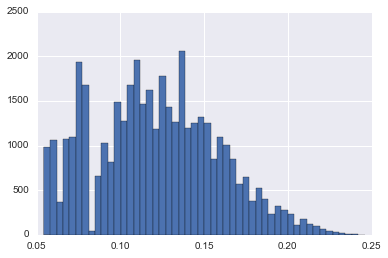

In [13]:
data['int_rate'].hist(bins=50)

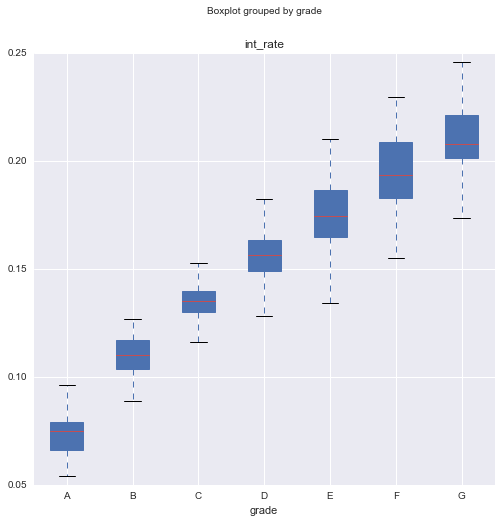

In [14]:
# Boxplot for int_rate over grade
data.boxplot(column="int_rate", by= "grade",figsize= (8,8),patch_artist=True)
plt.style.use('ggplot')

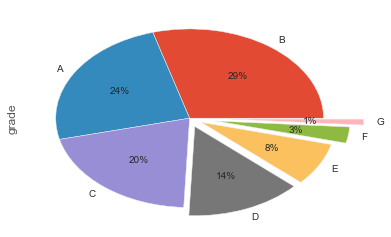

In [15]:
# Pie chart representing grade distributions
explode = (0,0,0,0.1,0.1,0.2,0.3)
data['grade'].value_counts().plot.pie(explode=explode, autopct='%1.0f%%',)


In [16]:
# What columns do we have?
print("{} columns: {}".format(len(data.columns), data.columns))

46 columns: Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_length', u'home_ownership', u'annual_inc', u'verification_status',
       u'issue_d', u'loan_status', u'pymnt_plan', u'purpose', u'zip_code',
       u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line',
       u'inq_last_6mths', u'open_acc', u'pub_rec', u'revol_bal', u'revol_util',
       u'total_acc', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'last_credit_pull_d',
       u'pub_rec_bankruptcies', u'new_int_rate', u'target', u'issue_year',
       u'issue_month'],
      dtype='object')


In [17]:

le_grade = preprocessing.LabelEncoder()
le_sub_grade = preprocessing.LabelEncoder()
le_home_ownership = preprocessing.LabelEncoder()
le_verification_status = preprocessing.LabelEncoder()
le_loan_status = preprocessing.LabelEncoder()
le_pymnt_plan = preprocessing.LabelEncoder()
le_purpose = preprocessing.LabelEncoder()
le_addr_state = preprocessing.LabelEncoder()


#to convert into numbers using LabelEncoder, to avoid negative values

data['grade'] = le_grade.fit_transform(data['grade'])
data['sub_grade'] = le_sub_grade.fit_transform(data['sub_grade'])
data['home_ownership'] = le_home_ownership.fit_transform(data['home_ownership'])
data['verification_status'] = le_verification_status.fit_transform(data['verification_status'])
data['loan_status'] = le_loan_status.fit_transform(data['loan_status'])
data['pymnt_plan'] = le_pymnt_plan.fit_transform(data['pymnt_plan'])
data['purpose'] = le_purpose.fit_transform(data['purpose'])
data['addr_state'] = le_addr_state.fit_transform(data['addr_state'])

# Hash the dataset until we determine columns that require it

#data['grade'] = data['grade'].apply(hash)
#data['sub_grade'] = data['sub_grade'].apply(hash)
#data['home_ownership'] = data['home_ownership'].apply(hash)
#data['verification_status'] = data['verification_status'].apply(hash)
#data['loan_status'] = data['loan_status'].apply(hash)
#data['pymnt_plan'] = data['pymnt_plan'].apply(hash)
#data['purpose'] = data['purpose'].apply(hash)
#data['addr_state'] = data['addr_state'].apply(hash)

data.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,new_int_rate,target,issue_year,issue_month
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,1,6,...,0.0,0.00,42384,171.62,42659,0,11,2,2016,12
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,2,13,...,122.9,1.11,42473,119.66,42659,0,15,2,2016,12
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,2,14,...,0.0,0.00,42535,649.91,42659,0,16,3,2016,12
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,2,10,...,0.0,0.00,42384,357.48,42476,0,13,2,2016,12
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,1,9,...,0.0,0.00,42659,67.79,42659,0,13,2,2016,12


In [18]:
feature_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', #'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       'loan_status', 'pymnt_plan', 
       'purpose', 
       'zip_code', 'addr_state', 
       'dti', #'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', #'new_int_rate', 'int_bucket', 
       'issue_year','issue_month'
        ]

target_col = 'target'


# Extract desired features and target column
X = data[feature_cols]
Y = np.asarray(data['grade'], dtype="|S6")



In [19]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

[  3.70082289e-02   3.75343294e-02   3.67437019e-02   2.61850089e-02
   6.42741275e-02   2.76340478e-02   1.82327802e-02   2.78245397e-02
   2.00740127e-02   1.54048016e-02   3.42607436e-06   2.54957643e-02
   2.78474532e-02   2.70195759e-02   3.01349153e-02   3.31593353e-02
   3.18860642e-02   5.57746679e-03   2.91914624e-02   7.68106264e-02
   3.05854471e-02   8.83658587e-04   8.86896545e-04   4.30118732e-02
   3.99195573e-02   3.67784747e-02   1.03636811e-01   7.64745231e-03
   6.55595496e-03   6.05841401e-03   3.00820517e-02   3.71457687e-02
   2.46422132e-02   3.53253493e-03   0.00000000e+00   3.05912226e-02]
Top 10 important features:
            feature  importance
26    total_rec_int    0.103637
19       revol_util    0.076811
4       installment    0.064274
23      total_pymnt    0.043012
24  total_pymnt_inv    0.039920
1       funded_amnt    0.037534
31  last_pymnt_amnt    0.037146
0         loan_amnt    0.037008
25  total_rec_prncp    0.036778
2   funded_amnt_inv    0.036744

In [20]:
# create a base classifier used to evaluate a subset of attributes
model = DecisionTreeClassifier(random_state=42)
names = data[feature_cols]

#rank all features, i.e continue the elimination until the last one
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X,Y)
print(rfe.ranking_)
 
# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': rfe.ranking_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("All important features:")
#print(feature_imps[:10])
print(feature_imps[:])

[ 7 13  4 22  1 23 28 15 26 24 35 25 16 19 14 20 18 30  9  6 12 34 33  8 10
  2  3 31 27 29 11  5 21 32 36 17]
All important features:
                    feature  importance
34               issue_year          36
10               pymnt_plan          35
21                out_prncp          34
22            out_prncp_inv          33
33     pub_rec_bankruptcies          32
27       total_rec_late_fee          31
17                  pub_rec          30
29  collection_recovery_fee          29
6            home_ownership          28
28               recoveries          27
8       verification_status          26
11                  purpose          25
9               loan_status          24
5                emp_length          23
3                      term          22
32       last_credit_pull_d          21
15           inq_last_6mths          20
13               addr_state          19
16                 open_acc          18
35              issue_month          17
12                 zip_co

In [21]:
# create a base classifier used to evaluate a subset of attributes
model = DecisionTreeClassifier(random_state=42)
model.fit(X, Y)
print(model.feature_importances_)

# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

[  3.45358033e-02   2.92395221e-02   5.54638519e-02   1.42197580e-02
   1.04615345e-01   1.24740117e-02   4.95062252e-03   2.41528281e-02
   5.83979280e-03   1.04380682e-02   0.00000000e+00   1.12202772e-02
   2.34313246e-02   1.74949646e-02   2.55994998e-02   1.68268446e-02
   2.43479285e-02   1.91098017e-03   3.04012742e-02   7.63343470e-02
   2.28071121e-02   1.55756425e-04   2.29710376e-04   2.96271991e-02
   2.93529963e-02   5.81851309e-02   1.90291277e-01   2.56100095e-03
   4.92109335e-03   3.23771785e-03   2.47902629e-02   7.06314496e-02
   1.67059906e-02   1.40878809e-03   0.00000000e+00   2.15974707e-02]
Top 10 important features:
            feature  importance
26    total_rec_int    0.190291
4       installment    0.104615
19       revol_util    0.076334
31  last_pymnt_amnt    0.070631
25  total_rec_prncp    0.058185
2   funded_amnt_inv    0.055464
0         loan_amnt    0.034536
18        revol_bal    0.030401
23      total_pymnt    0.029627
24  total_pymnt_inv    0.029353

In [22]:
# feature selection using random forest
randomforest = RandomForestClassifier()
randomforest.fit(X, Y)
 
# Analyze feature importance
feature_imps = pd.DataFrame({'feature': X.columns, 'importance': randomforest.feature_importances_})
feature_imps.sort_values(by='importance', ascending=False, inplace=True)
print("Top 10 important features:")
print(feature_imps[:10])

Top 10 important features:
            feature  importance
26    total_rec_int    0.133887
19       revol_util    0.083818
4       installment    0.079082
31  last_pymnt_amnt    0.050380
23      total_pymnt    0.047577
24  total_pymnt_inv    0.045976
2   funded_amnt_inv    0.043916
25  total_rec_prncp    0.040341
18        revol_bal    0.035431
14              dti    0.033145


In [23]:
#use this function to randomly select the features
#we should look at a few thousand scenarios as we explore the best scores
def RandomFeatures():
    features = df_features.columns.values.tolist()
    results = list()
    for f in features:
        randomNumber = random.randint(1, 10)
        if randomNumber >= 5:
            results.append(f)
        
    return results


In [24]:
#automated classifier support
'''
model = KNN,LOG_REG, ETC
ts = test size (.4)
'''


def PredStats(model,ts):
    
    feature_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'installment', #'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       'loan_status', 'pymnt_plan', 
       'purpose', 
       'zip_code', 'addr_state', 
       'dti', #'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 
       'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', #'new_int_rate', 'int_bucket', 
       'issue_year','issue_month'
        ]
    
    X = np.matrix(data[feature_cols])
    y = np.asarray(data['target'])
    
    #train the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=ts)

    if model == 'KNN_REG':
        #knn regressor
        knearest_clf = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='LOG_REG':
        #logistic regression classifier
        logreg = LogisticRegression()
        logreg = logreg.fit(X_train, y_train)
        y_pred_class = logreg.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='SGD_CLF':
        #stocastic gradient descent classifier
        sdgclf = linear_model.SGDClassifier()
        sdgclf = sdgclf.fit(X_train, y_train)
        y_pred_class = sdgclf.predict(X_test)
    elif model =='KNN_CLF':
        #knn classifier
        knearest_clf = neighbors.KNeighborsClassifier(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
    elif model =='BAYES':
        #bayes classifier
        bayes_clf = BernoulliNB()
        #fit classifier
        bayes_clf.fit(X_train, y_train)
        y_pred_class = bayes_clf.predict(X_test)
    else:
        print('Input a correct model')
        #break
        
    #cm.plot()
    #print(cm.print_stats())
    if model == 'LOG_REG':
        print('Coefficients: \n',logreg.coef_)
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , logreg.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'KNN_REG':
        print ('KNN Score: ',knearest_clf.score(X,y))
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , knearest_clf.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'SGD_CLF':
        scores = cross_val_score(sdgclf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % sdgclf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))
    elif model == 'KNN_CLF':
        scores = cross_val_score(knearest_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % knearest_clf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))
    elif model == 'BAYES':
        scores = cross_val_score(bayes_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % bayes_clf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))





In [25]:
# Look for the best score
#for i in range(5):
PredStats("SGD_CLF",.4)

Scores:  [ 0.52514865  0.47811464]
Score mean: 0.501631646098
Classification report for SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
             precision    recall  f1-score   support

          1       0.50      0.95      0.65      5394
          2       0.69      0.34      0.45      7726
          3       0.60      0.45      0.51      3010
          4       0.04      0.01      0.01       284

avg / total       0.60      0.55      0.52     16414

F1 micro: 0.5534

F1 macro: 0.4078

F1 weighted: 0.5225

Accuracy: 0.5534


In [26]:
# Look for the best score
#for i in range(5):
PredStats("KNN_CLF",.4)

Scores:  [ 0.45472268  0.42737376]
Score mean: 0.441048219795
Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.41      0.69      0.51      5394
          2       0.49      0.42      0.45      7726
          3       0.46      0.12      0.19      3010
          4       0.07      0.00      0.01       284

avg / total       0.45      0.44      0.42     16414

F1 micro: 0.4449

F1 macro: 0.2903

F1 weighted: 0.4163

Accuracy: 0.4449


In [27]:
# Look for the best score
#for i in range(5):
PredStats("BAYES",.4)

Scores:  [ 0.47290184  0.45915383]
Score mean: 0.46602783672
Classification report for BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
             precision    recall  f1-score   support

          1       0.47      0.42      0.45      5394
          2       0.50      0.65      0.56      7726
          3       0.37      0.19      0.26      3010
          4       0.00      0.00      0.00       284

avg / total       0.46      0.48      0.46     16414

F1 micro: 0.4792

F1 macro: 0.3163

F1 weighted: 0.4589

Accuracy: 0.4792


In [28]:
#automated classifier support with hyperparameter selection
'''
model = KNN,LOG_REG, ETC
ts = test size (.4)
'''
from sklearn.feature_selection import SelectKBest, chi2


def PredStats2(model,ts):
    
    feature_cols = [#'loan_amnt', 
        ##'funded_amnt', 
        'funded_amnt_inv', ##'term', 
        'installment', 
        #'grade', 
        #'sub_grade',
       ##'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       ##'loan_status', 'pymnt_plan', 
       ##'purpose', 
       ##'zip_code', 'addr_state', 
       #'dti', 
        #'delinq_2yrs', 'earliest_cr_line',
       ##'inq_last_6mths', 'open_acc', 'pub_rec', 
       ##'revol_bal', 
        ###'revol_util',
       ##'total_acc', 
       ##'out_prncp', 'out_prncp_inv', 
        ###'total_pymnt',
       #'total_pymnt_inv', 
        'total_rec_prncp', 
        'total_rec_int',
       ##'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       ##'last_pymnt_d', 
        'last_pymnt_amnt', 
        #'last_credit_pull_d',
       ##'pub_rec_bankruptcies', 
        #'new_int_rate', #'int_bucket', 
       ##'issue_year','issue_month'
        ]
    
    #X = np.matrix(data[feature_cols])
    #y = np.asarray(data['target'])
    
    # Extract desired features and target column
    X = data[feature_cols]
    y = np.asarray(data['target'])
    
    #train the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=ts)
    parameters = [{'alpha':np.linspace(0.1,1,10)}]
    
    
    if model == 'KNN_REG':
        #knn regressor
        knearest_clf = neighbors.KNeighborsRegressor(n_neighbors=2, weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='LOG_REG':
        #logistic regression classifier
        logreg = LogisticRegression()
        logreg = logreg.fit(X_train, y_train)
        y_pred_class = logreg.predict(X_test)
        cm = ConfusionMatrix(y_test, y_pred_class)
    elif model =='SGD_CLF':
        #stocastic gradient descent classifier
        sdgclf = linear_model.SGDClassifier()
        sdgclf = sdgclf.fit(X_train, y_train)
        y_pred_class = sdgclf.predict(X_test)
    elif model =='KNN_CLF':
        #knn classifier
        knearest_clf = neighbors.KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform') 
        knearest_clf = knearest_clf.fit(X_train, y_train)
        y_pred_class = knearest_clf.predict(X_test)
    elif model =='BAYES':
        #bayes classifier
        bayes_clf = GridSearchCV(BernoulliNB(), parameters, cv=10, scoring='accuracy')
        #apply feature selection using chi2 
        #skb = SelectKBest(chi2, k=10)
        #X_train = skb.fit_transform(X_train, y_train)
        #X_test = skb.transform(X_test)
        #fit classifier
        bayes_clf.fit(X_train, y_train)
        y_pred_class = bayes_clf.predict(X_test)
        
        ##bayes classifier
        #bayes_clf = BernoulliNB()
        ##fit classifier
        #bayes_clf.fit(X_train, y_train)
        #y_pred_class = bayes_clf.predict(X_test)
    else:
        print('Input a correct model')
        #break
        
    #cm.plot()
    #print(cm.print_stats())
    if model == 'LOG_REG':
        print('Coefficients: \n',logreg.coef_)
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , logreg.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'KNN_REG':
        print ('KNN Score: ',knearest_clf.score(X,y))
        print('MSE:',metrics.mean_squared_error(y_test,y_pred_class))
        print('Variance score: ' , knearest_clf.score(X,y))
        print('R2 score: ' , metrics.r2_score(X,y))
    elif model == 'SGD_CLF':
        scores = cross_val_score(sdgclf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % sdgclf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))
    elif model == 'KNN_CLF':
        scores = cross_val_score(knearest_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % knearest_clf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))
    elif model == 'BAYES':
        scores = cross_val_score(bayes_clf, X, y, cv=2, scoring='accuracy')
        print('Scores: ',scores)
        print('Score mean:',scores.mean())
        print('Classification report for %s' % bayes_clf)
        print(metrics.classification_report(y_test, y_pred_class))
        print('F1 micro: %1.4f\n' % f1_score(y_test, y_pred_class, average='micro'))
        print('F1 macro: %1.4f\n' % f1_score(y_test, y_pred_class, average='macro'))
        print('F1 weighted: %1.4f\n' % f1_score(y_test, y_pred_class, average='weighted'))
        print('Accuracy: %1.4f' % (accuracy_score(y_test, y_pred_class)))
        
        
        

In [37]:
# Look for the best score
#for i in range(5):
PredStats2("BAYES",.4)

Scores:  [ 0.47451019  0.47455644]
Score mean: 0.474533314965
Classification report for GridSearchCV(cv=10, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
             precision    recall  f1-score   support

          1       0.50      0.00      0.00      5394
          2       0.47      1.00      0.64      7726
          3       0.00      0.00      0.00      3010
          4       0.00      0.00      0.00       284

avg / total       0.39      0.47      0.30     16414

F1 micro: 0.4707

F1 macro: 0.1601

F1 weighted: 0.3014

Accuracy: 0.4707


In [30]:
# Look for the best score
#for i in range(5):
PredStats2("KNN_CLF",.4)

Scores:  [ 0.74870845  0.76476896]
Score mean: 0.756738705964
Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.83      0.83      0.83      5394
          2       0.78      0.86      0.82      7726
          3       0.78      0.63      0.70      3010
          4       0.61      0.19      0.29       284

avg / total       0.79      0.79      0.79     16414

F1 micro: 0.7950

F1 macro: 0.6596

F1 weighted: 0.7899

Accuracy: 0.7950


In [31]:
# Look for the best score
#for i in range(5):
PredStats2("SGD_CLF",.4)

Scores:  [ 0.45043377  0.45403587]
Score mean: 0.452234819957
Classification report for SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)
             precision    recall  f1-score   support

          1       0.43      0.99      0.60      5394
          2       0.51      0.21      0.30      7726
          3       0.00      0.00      0.00      3010
          4       0.23      0.60      0.33       284

avg / total       0.39      0.44      0.35     16414

F1 micro: 0.4370

F1 macro: 0.3083

F1 weighted: 0.3454

Accuracy: 0.4370


In [32]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets



feature_cols = [#'loan_amnt', 
        ##'funded_amnt', 
        'funded_amnt_inv', ##'term', 
        'installment', 
        #'grade', 
        #'sub_grade',
       ##'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 
       ##'loan_status', 'pymnt_plan', 
       ##'purpose', 
       ##'zip_code', 'addr_state', 
       #'dti', 
        #'delinq_2yrs', 'earliest_cr_line',
       ##'inq_last_6mths', 'open_acc', 'pub_rec', 
       ##'revol_bal', 
        ###'revol_util',
       ##'total_acc', 
       ##'out_prncp', 'out_prncp_inv', 
        ###'total_pymnt',
       #'total_pymnt_inv', 
        'total_rec_prncp', 
        'total_rec_int',
       ##'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       ##'last_pymnt_d', 
        'last_pymnt_amnt', 
        #'last_credit_pull_d',
       ##'pub_rec_bankruptcies', 
        #'new_int_rate', #'int_bucket', 
       ##'issue_year','issue_month'
        ]
    
#X = np.matrix(data[feature_cols])
#y = np.asarray(data['target'])
    
# Extract desired features and target column
X = data[feature_cols]
y = np.asarray(data['target'])
    
#train the data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.4)
parameters = [{'alpha':np.linspace(0.1,1,10)}]



model = KNN,LOG_REG, ETC
ts = test size (.4)



In [49]:
X.shape

(41034, 5)

The optimal number of neighbors is 5


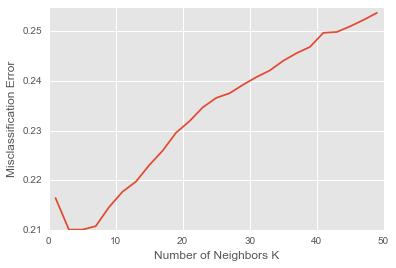

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='uniform')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

LR: 0.500823 (0.079957)
KNN: 0.626184 (0.087876)
SGD: 0.285350 (0.094821)
CART: 0.679361 (0.073038)
G-NB: 0.323998 (0.055142)
B-NB: 0.294389 (0.037486)


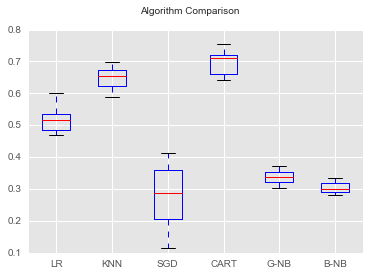

In [46]:

# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



# prepare configuration for cross validation test harness
num_folds = 10
num_instances = len(X)
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='uniform')))
models.append(('SGD', linear_model.SGDClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('G-NB', GaussianNB()))
models.append(('B-NB', BernoulliNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
	cv_results = cross_validation.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()